In [525]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [526]:
# Load ands show the first 10 rows of the data to see data's structure
df = pd.read_csv('data.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.0
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0,200000.0
8,8,50,RM,6120,Inside,1Fam,5,1931,1950,BrkFace,0.0,952.0,129900.0
9,9,190,RL,7420,Corner,2fmCon,6,1939,1950,MetalSd,0.0,991.0,118000.0


1	Id:	To count the records.

2	MSSubClass:	 Identifies the type of dwelling involved in the sale.

3	MSZoning:	Identifies the general zoning classification of the sale.

4	LotArea:	 Lot size in square feet.

5	LotConfig:	Configuration of the lot

6	BldgType:	Type of dwelling

7	OverallCond:	Rates the overall condition of the house

8	YearBuilt:	Original construction year

9	YearRemodAdd:	Remodel date (same as construction date if no remodeling or additions).

11	BsmtFinSF2:	Type 2 finished square feet.

12	TotalBsmtSF:	Total square feet of basement area

13	SalePrice:	To be predicted

In [527]:
# Check data type of each variable an correct the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [528]:
#Drop Id colum
df.drop('Id', axis=1, inplace=True)

# Check data statistic for each variable
df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [529]:
# Check missing/null values of data
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [530]:
# Drop Null values and Duplicate rows if any in the dataset
df.dropna(inplace=True)
df. drop_duplicates(inplace=True)
df.shape

(1460, 12)

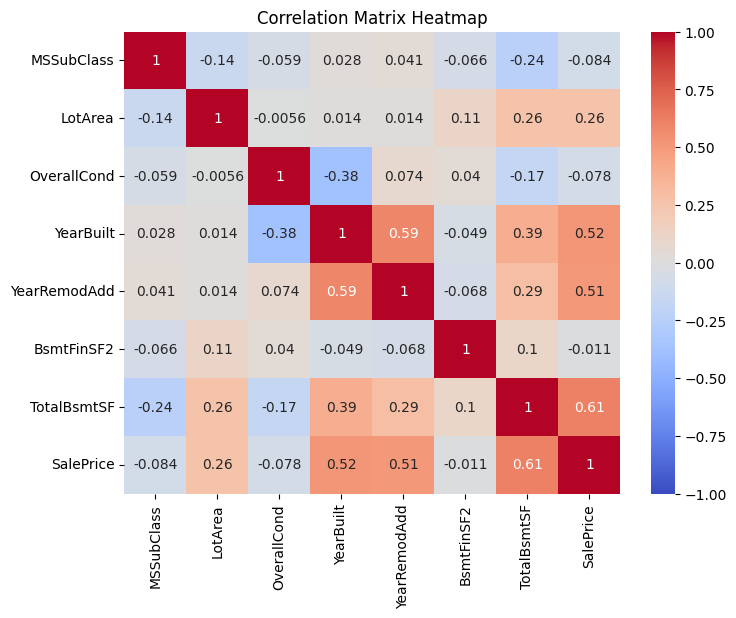

In [531]:
# Inspect correlation matrix 

# Select only numerical columns
numerical_df = df.select_dtypes(include='number')

# Compute the correlation matrix for the numerical columns
correlation_matrix = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Adding a title
plt.title('Correlation Matrix Heatmap')

# Display the plot
plt.show()

Based on the heatmap, there are 3 variables significantly impact the sale price in this dataset. They are YearBuilt, YearRemodAdd, and TotalBsmtSF

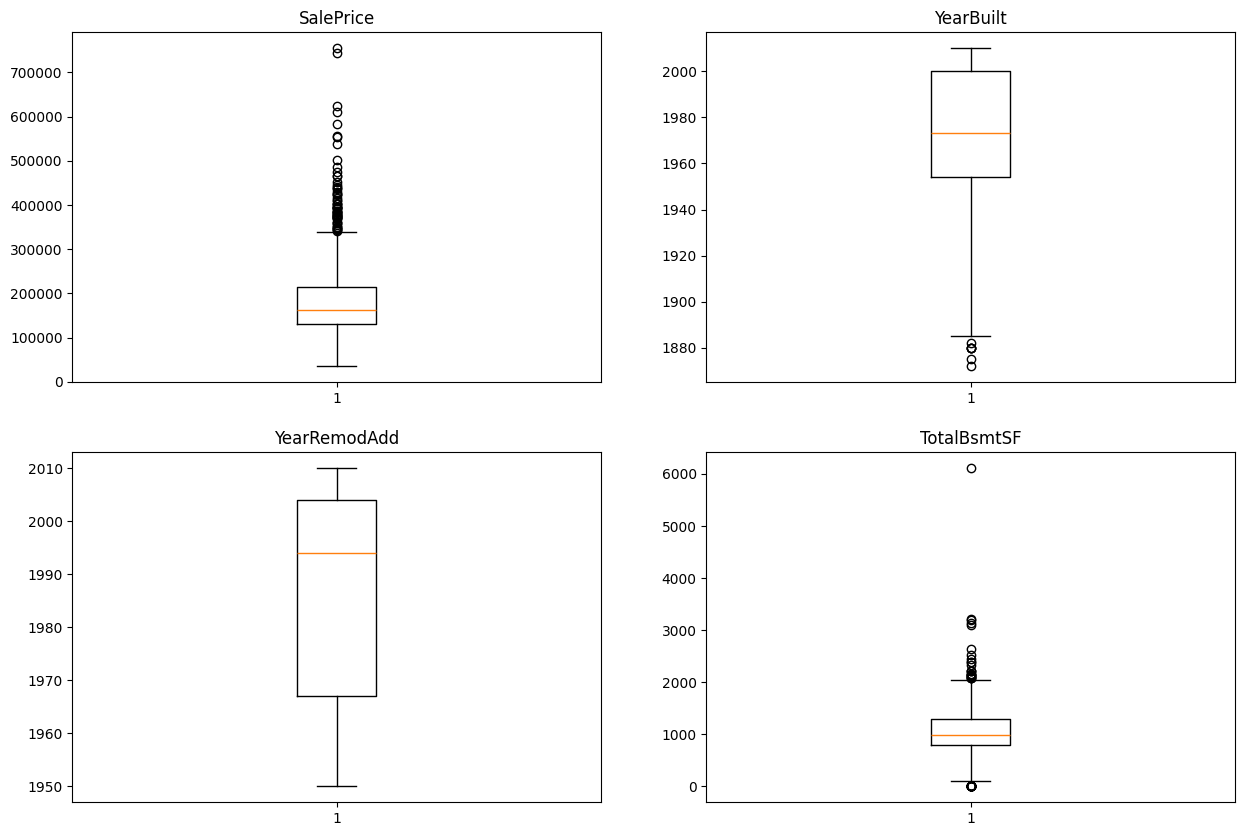

In [532]:
# Detect outliers using Boxplot
feature = ['SalePrice', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF']
plt.figure(figsize=(15,10))
for i,col in enumerate(feature):
    plt.subplot(2,2,i+1)
    plt.boxplot(df[col])
    plt.title(f'{col}')
plt.show()

In [533]:
# Handle outliers using Z-score

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[['SalePrice','YearBuilt', 'TotalBsmtSF']]))

# Set a threshold for Z-score (common choice is 3)
threshold = 2

# Identify outliers
outliers = np.where(z_scores > threshold)

# Remove outliers
df = df[(z_scores < threshold).all(axis=1)]

# Reset index
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1299 non-null   int64  
 1   MSZoning      1299 non-null   object 
 2   LotArea       1299 non-null   int64  
 3   LotConfig     1299 non-null   object 
 4   BldgType      1299 non-null   object 
 5   OverallCond   1299 non-null   int64  
 6   YearBuilt     1299 non-null   int64  
 7   YearRemodAdd  1299 non-null   int64  
 8   Exterior1st   1299 non-null   object 
 9   BsmtFinSF2    1299 non-null   float64
 10  TotalBsmtSF   1299 non-null   float64
 11  SalePrice     1299 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 121.9+ KB


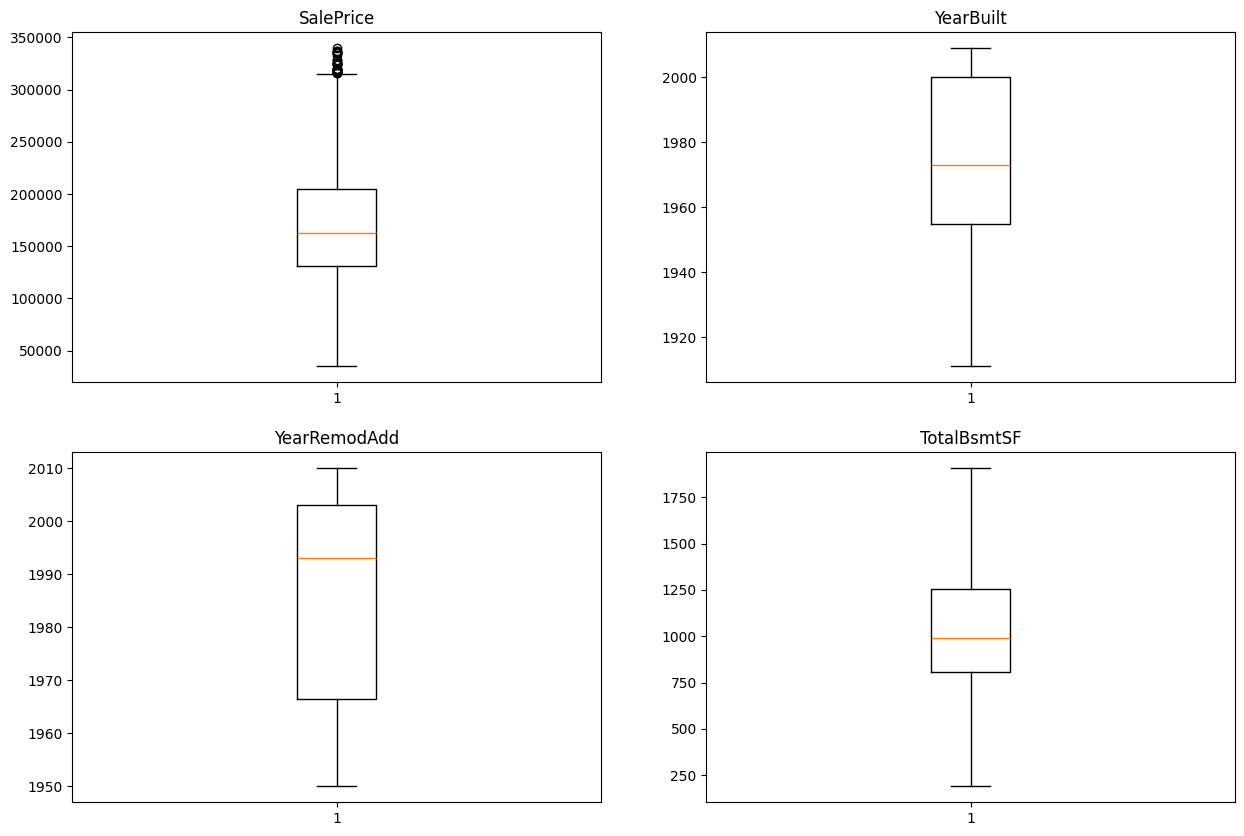

In [534]:
# Boxplot after handling outliers
feature = ['SalePrice', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF']
plt.figure(figsize=(15,10))
for i,col in enumerate(feature):
    plt.subplot(2,2,i+1)
    plt.boxplot(df[col])
    plt.title(f'{col}')
plt.show()

The outliers are removed from the dataset

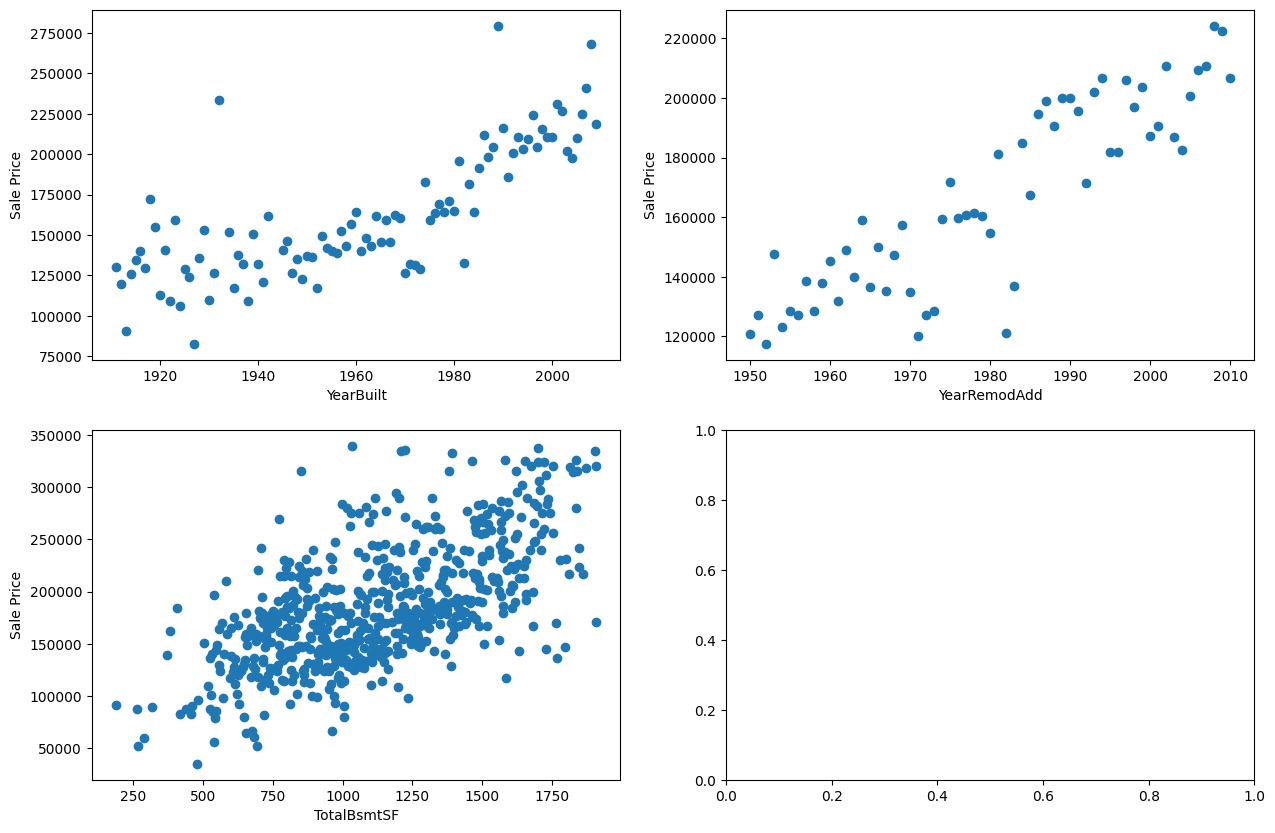

In [546]:
# Plot the graphs to see relationships between SalePrice and 3 significant variables
feature = ['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF']
plt.subplots(2,2, figsize=(15,10))
for i, col in enumerate(feature):
    grouped_data = df.groupby(col)['SalePrice'].mean()
    plt.subplot(2,2,i+1)
    plt.scatter(grouped_data.index, grouped_data.values)
    plt.xlabel(f'{col}')
    plt.ylabel('Sale Price')
plt.show()

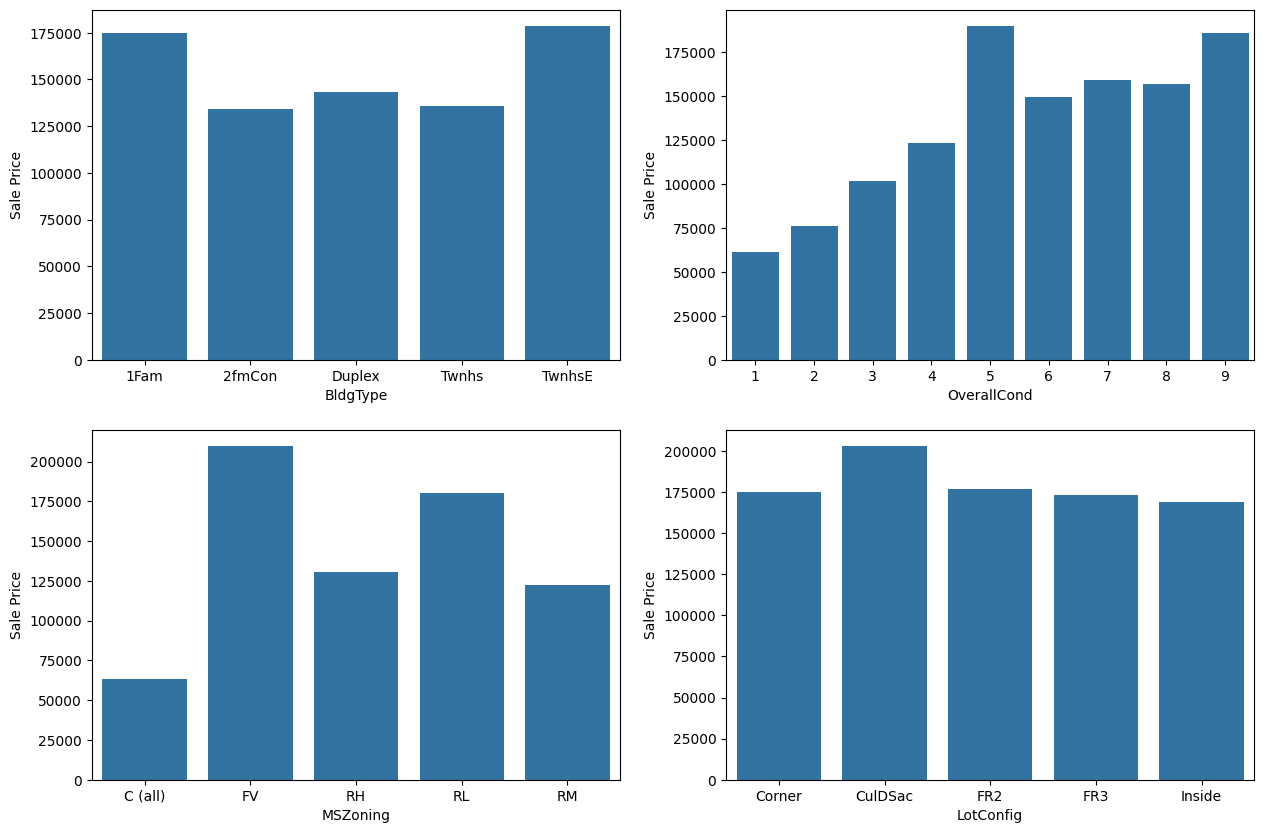

In [543]:
# Graph the plots to compare house's prices based on BldgType, OverallCond, MSZoning, LotConfig

feature = ['BldgType', 'OverallCond','MSZoning', 'LotConfig']
plt.subplots(2,2, figsize=(15,10))
for i, col in enumerate(feature):
    grouped_data = df.groupby(col)['SalePrice'].mean()
    plt.subplot(2,2,i+1)
    sns.barplot(x= grouped_data.index, y= grouped_data.values)
    plt.xlabel(f'{col}')
    plt.ylabel('Sale Price')
plt.show()

Based on the graphs, I decided to use linear models to build a ML model to predict the house's prices. 

In [537]:
# Build Linear Regression Model
X = df[['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF']]
Y = df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=40)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

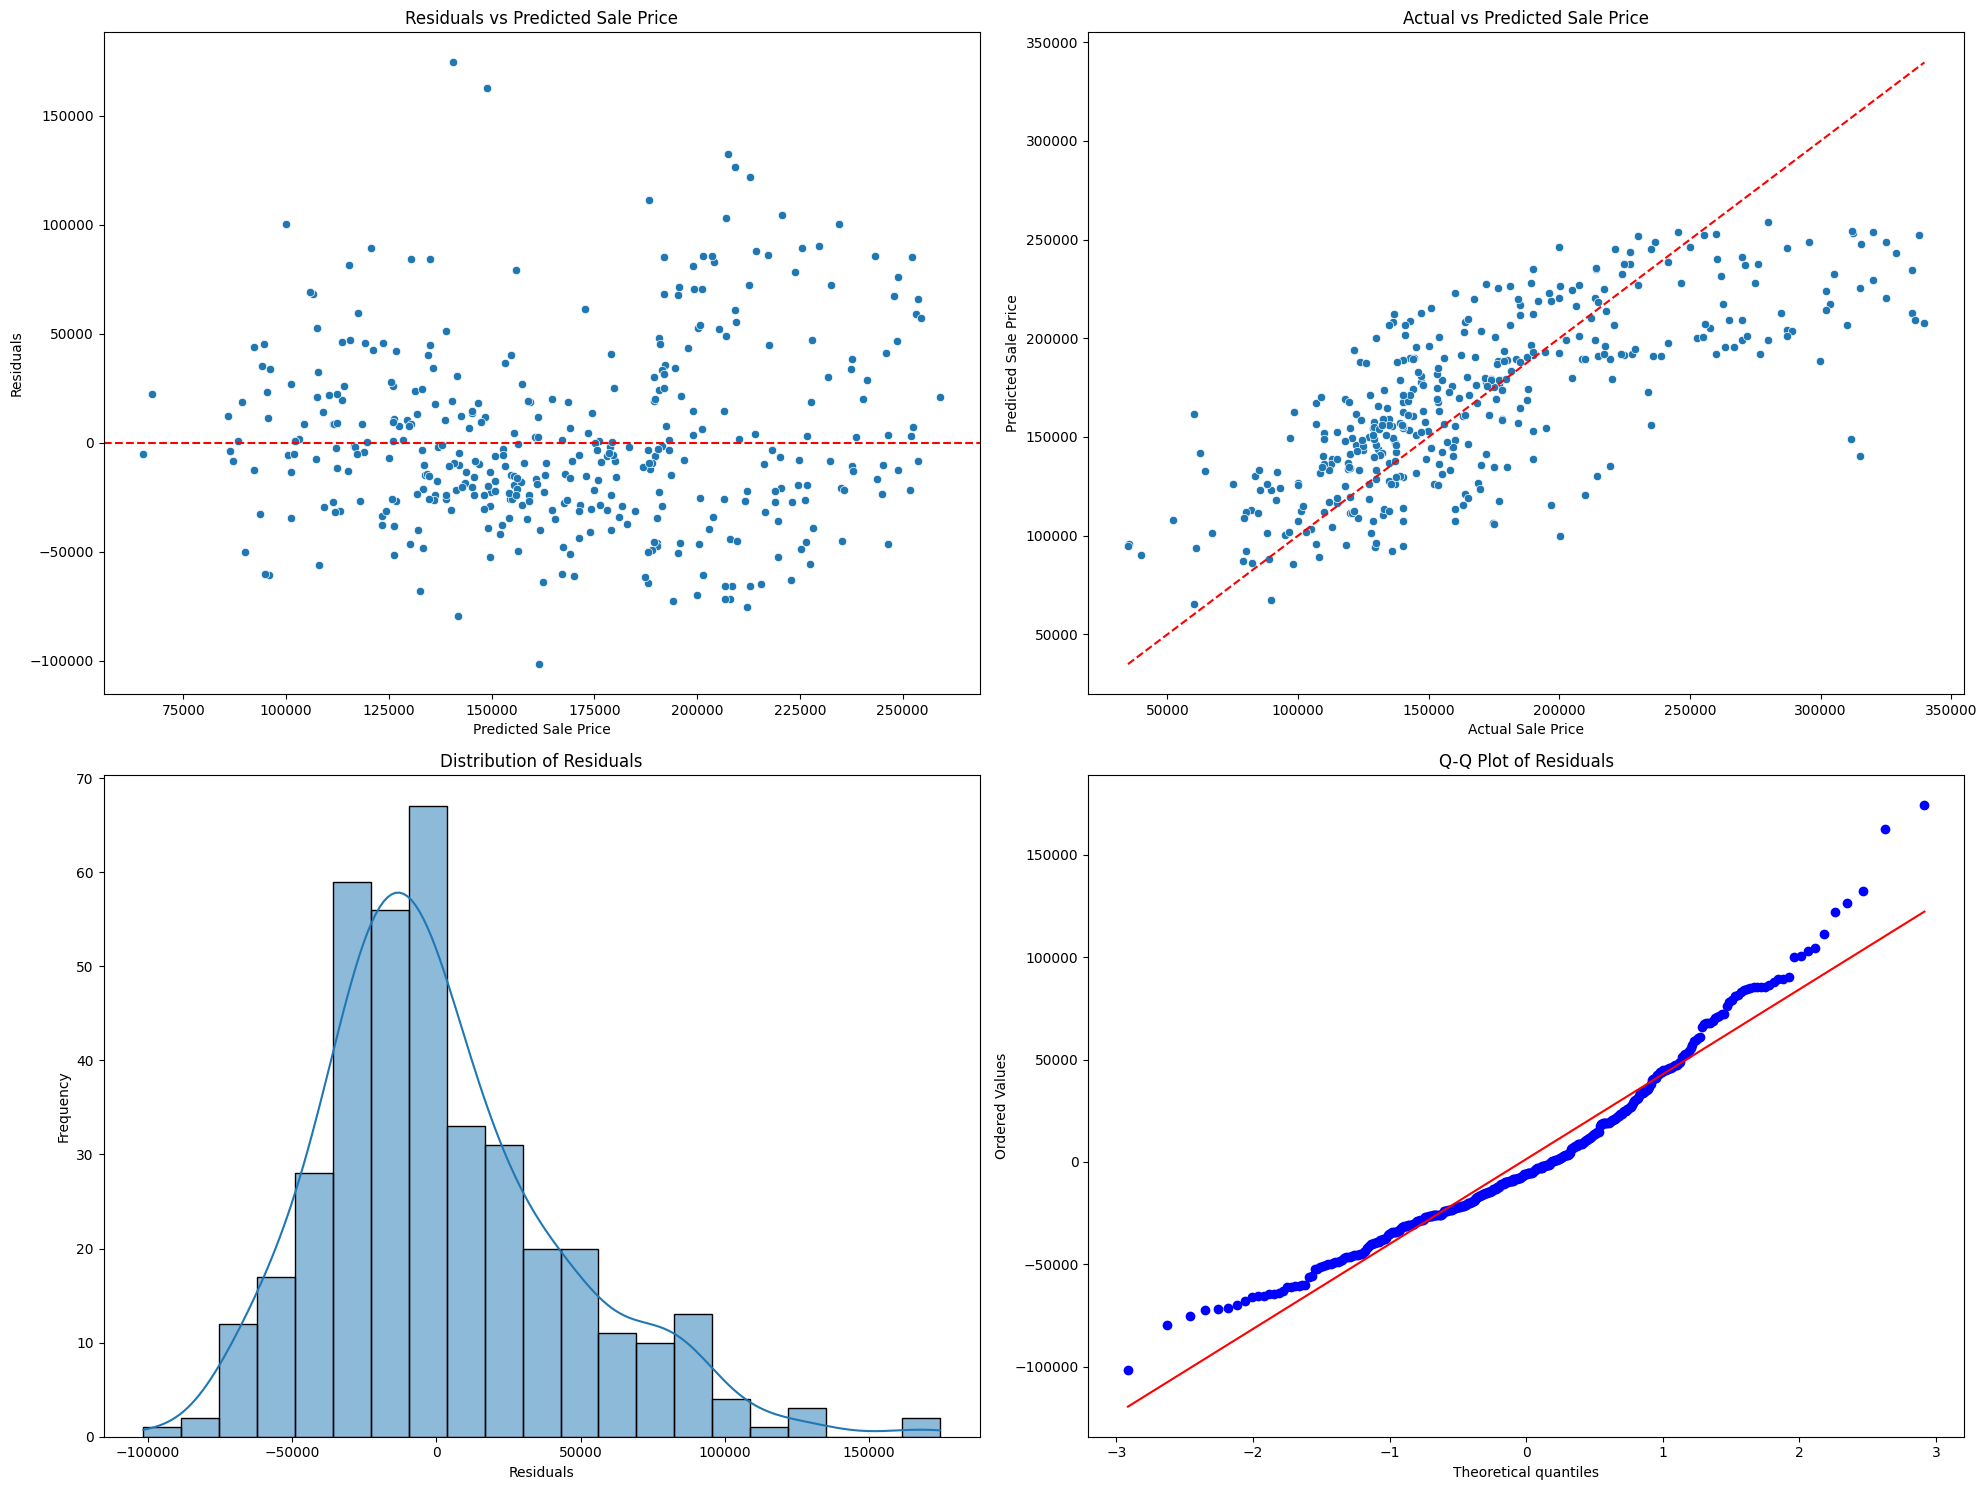

In [538]:
# Calculate residuals
residuals = Y_test - Y_pred

# Create a 2x3 grid of subplots
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

# Plot 1: Residuals vs Predicted Sale Price
plt.subplot(2, 2, 1)
sns.scatterplot(x=Y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price')

# Plot 2: Actual vs Predicted Sale Price
plt.subplot(2, 2, 2)
sns.scatterplot(x=Y_test, y=Y_pred, ax=ax[0, 1])
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='r', linestyle='--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')

# Plot 3: Distribution of Residuals
plt.subplot(2, 2, 3)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

# Plot 4: Q-Q Plot of Residuals
plt.subplot(2, 2, 4)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [539]:
# Evaluate model

mae = mean_absolute_error(Y_test, Y_pred)
print("MAE:", mae)
mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(Y_test, Y_pred)
print("R²:", r2)

MAE: 32191.819165187335
MSE: 1782509142.943072
RMSE: 42219.77194328591
R²: 0.5443249179984266


1. Mean Absolute Error (MAE): 32,191.82
Interpretation: The MAE represents the average absolute difference between the actual and predicted values. On average, the model's predictions are off by approximately $32,191.82.
Evaluation: MAE is useful for understanding the typical error in the same units as the target variable (SalePrice in this case). Lower values indicate better model performance, but whether this MAE is acceptable depends on the context (e.g., the average sale price).
2. Mean Squared Error (MSE): 1,782,509,142.94
Interpretation: MSE represents the average of the squared differences between the actual and predicted values. The MSE penalizes larger errors more than smaller ones because the errors are squared.
Evaluation: MSE is less interpretable directly because it is in squared units of the target variable (dollars squared). However, lower MSE values are preferred. This metric is often used to assess the variance in the errors.
3. Root Mean Squared Error (RMSE): 42,219.77
Interpretation: RMSE is the square root of the MSE, which brings the error metric back to the same units as the target variable. In this case, the RMSE indicates that, on average, the model's predictions deviate from the actual values by about $42,219.77.
Evaluation: Like MAE, the RMSE provides an understanding of the model's prediction accuracy. However, RMSE is more sensitive to outliers than MAE because it squares the errors before averaging. In general, a lower RMSE indicates a better fit.
4. R-squared (R²): 0.5443
Interpretation: R² indicates the proportion of the variance in the dependent variable (SalePrice) that is predictable from the independent variables (e.g., YearBuilt, TotalBsmtSF, GrLivArea). An R² value of 0.5443 means that approximately 54.43% of the variance in SalePrice can be explained by the model.
Evaluation:
Moderate Fit: An R² of 0.5443 suggests that the model explains just over half of the variability in the data. While this is better than a low R², it also indicates that there is significant variability in SalePrice that the model is not capturing. This might suggest that the model could be improved by adding more relevant features, trying non-linear models, or tuning the model further.
Context: The acceptability of this R² value depends on the domain. In some fields, an R² around 0.5 might be considered adequate, while in others, it might be seen as too low.
Overall Model Evaluation:
Accuracy: The MAE and RMSE indicate that the model's predictions have a typical error in the range of $32,000 to $42,000. Whether this is acceptable depends on the context of the problem (e.g., if the typical sale price is in the range of hundreds of thousands of dollars, these errors might be considered large).

Fit Quality: The R² value of 0.5443 suggests that the model captures some, but not all, of the variability in the data. There is room for improvement, potentially by including additional relevant features, exploring interactions, or even considering non-linear models if the relationship between the features and SalePrice is not strictly linear.